# Charts - Optimal Stage

In [1]:
import notebookimport

In [2]:
if __name__=='__main__':
    year=2019
    rc='RC1'
    ss='SS5'
    rally='Sweden'
    snum=int(ss.replace('SS',''))

    typ='stage_times_stage' #stage_times_stage stage_times_overall
    typ='stage_times_overall'

In [3]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline


import sqlite3
if __name__=='__main__':
    dbname='sweden19.db'
    conn = sqlite3.connect(dbname)

In [4]:
#sr = __import__("Charts - Stage Results")
ssd = __import__("Charts - Split Sector Delta")

importing Jupyter notebook from Charts - Split Sector Delta.ipynb


In [5]:
splits = ssd.dbGetSplits(conn,rally,ss,rc)

In [6]:
splitdurations = ssd.getSplitDurationsFromSplits(conn,rally,ss,rc='RC1')

splitdurations.head(10)

,drivercode,splitDurationS,startDateTime,stageTimeDurationMs,section
0,OGI,94.9,2019-02-15T12:54:00,631300.0,1
1,OGI,104.4,2019-02-15T12:54:00,631300.0,2
2,OGI,77.7,2019-02-15T12:54:00,631300.0,3
3,OGI,107.3,2019-02-15T12:54:00,631300.0,4
4,OGI,138.1,2019-02-15T12:54:00,631300.0,5
73,OGI,108.9,2019-02-15T12:54:00,631300.0,6
5,NEU,91.5,2019-02-15T12:56:00,639400.0,1
6,NEU,101.7,2019-02-15T12:56:00,639400.0,2
7,NEU,74.2,2019-02-15T12:56:00,639400.0,3
8,NEU,104.9,2019-02-15T12:56:00,639400.0,4


In [7]:
ignoresplitsfordrivercodes=['LAP']
if ignoresplitsfordrivercodes is not None:
    ignoresplitsfordrivercodes = [ignoresplitsfordrivercodes] if not isinstance(ignoresplitsfordrivercodes,list) else ignoresplitsfordrivercodes
    splitdurations = splitdurations[~splitdurations['drivercode'].isin(ignoresplitsfordrivercodes)].copy()

In [8]:
splitdurations['sectorrank']=splitdurations.groupby(['section'])['splitDurationS'].rank(method='dense').astype(int)
splitdurations.head()

,drivercode,splitDurationS,startDateTime,stageTimeDurationMs,section,sectorrank
0,OGI,94.9,2019-02-15T12:54:00,631300.0,1,12
1,OGI,104.4,2019-02-15T12:54:00,631300.0,2,9
2,OGI,77.7,2019-02-15T12:54:00,631300.0,3,11
3,OGI,107.3,2019-02-15T12:54:00,631300.0,4,10
4,OGI,138.1,2019-02-15T12:54:00,631300.0,5,8


In [9]:
order = splits.sort_values(['stageTimeDurationMs','drivercode'])['drivercode'].unique().tolist()

In [10]:
#splitdurations = rebaseSplitDurations(splitdurations, drivercode='MIK')
splitdurations = ssd.rebaseSplitDurationsBest(splitdurations)
splitdurations.head()

,drivercode,splitDurationS,startDateTime,stageTimeDurationMs,section,sectorrank,rebased,sectorBestDriver
0,OGI,94.9,2019-02-15T12:54:00,631300.0,1,12,9.9,MEE
1,OGI,104.4,2019-02-15T12:54:00,631300.0,2,9,4.8,EVA
2,OGI,77.7,2019-02-15T12:54:00,631300.0,3,11,5.8,EVA
3,OGI,107.3,2019-02-15T12:54:00,631300.0,4,10,4.9,EVA
4,OGI,138.1,2019-02-15T12:54:00,631300.0,5,8,4.7,EVA


In [11]:
from statsmodels.graphics import utils
from numpy import arange

order = ssd.getSplitOrderByStageTimeDuration(splitdurations)
splitdurationsbydriver=splitdurations.groupby('drivercode')


In [12]:
import math


In [13]:
ydim = 'rebased'

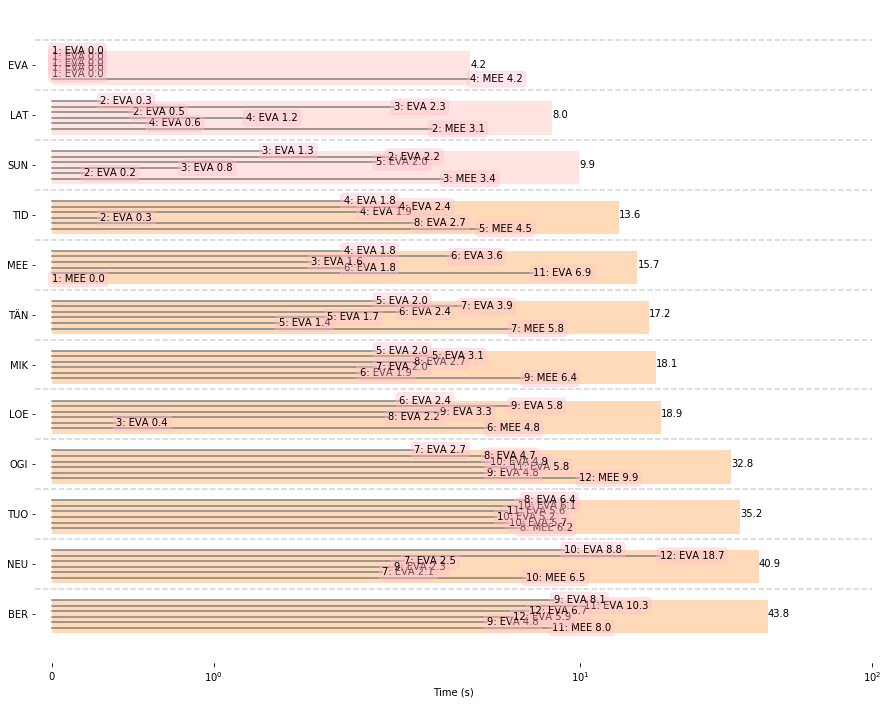

In [16]:
from pylab import barh

#swap x and y
labdim = 'sectorrank'
timelabel='Time (s)'
driverlabels=None
label=True
timelim=(-0.1,100)
keyHighlight=None#'leader'#None
fig, ax = plt.subplots(figsize=(15,12))


order = ssd.getSplitOrderByStageTimeDuration(splitdurations)
splitdurationsbydriver=splitdurations.groupby('drivercode')

#fig, ax = utils.create_mpl_ax(ax)

timedim='rebased'

splitdurations['stageTimeDurationS']=(splitdurations['stageTimeDurationMs']/1000).round(1)
tmp=splitdurations[['stageTimeDurationS','drivercode']].drop_duplicates()#.plot(kind='barh',ax=ax)

start = 0
ticks = []
tmpxlabels = []

#named colors: http://matplotlib.org/examples/color/named_colors.html
highlightColors=['mistyrose','lightsalmon','salmon','tomato','orangered']
baseColors=['silver','lightblue','paleturquoise','lightcyan','lightgreen']
barColors=['peachpuff','moccasin','mistyrose']
    
for key in order[::-1]:
    df=splitdurationsbydriver.get_group(key)
    #print(df.columns)
    nobs = len(df)
    driver_plot = arange(start, start + nobs)
    ticks.append(driver_plot.mean())
    #Third parameter is color; 'k' is black
    #ax.plot(x_plot, df[ydim], 'g', linestyle='--')
    #?so how can we plot bars underneath this chart?
    rebasedoverall = df['rebased'].sum()
    bcolor = 'lightgrey' if math.log10(rebasedoverall)<=0 else barColors[int(math.log10(rebasedoverall))-1]
    ax.barh(start+2, rebasedoverall, len(df), color=bcolor)
    ax.text(rebasedoverall,start+2,round(rebasedoverall,2), horizontalalignment='left')
    if key==keyHighlight:
        colors=highlightColors
    else:
        colors=baseColors
    for i in range(0,nobs):
        ax.plot( (0, df[ydim].iloc[i]),(driver_plot[i],driver_plot[i]), 'grey')
        #if timelim is not None and (df[timedim].iloc[i]<=timelim[0] or df[timedim].iloc[i]>=timelim[1]): continue
        if label:
            if nobs<=len(colors):
                if keyHighlight=='leader':
                    if int(df[labdim].iloc[i])==1: color=highlightColors[i-nobs]
                    else: color=baseColors[i-nobs]
                else:
                    color=colors[i-nobs]
            else: color='pink'
            if timelim is not None and df[timedim].iloc[i]>=timelim[1]:
                timemax = timelim[1]
            else:
                timemax = df[timedim].iloc[i]
            ax.text(timemax,driver_plot[i],  
                    '{}: {} {}'.format(int(df[labdim].iloc[i]),df['sectorBestDriver'].iloc[i],df[timedim].iloc[i].round(1) ),
                    bbox=dict(  boxstyle='round,pad=0.3',color=color, alpha=0.4), #circle | round
                    verticalalignment='center', horizontalalignment='left')
        else:
            pass
            #ax.plot(x_plot[i], df[labdim].iloc[i], 'or')
        
    start += nobs+3
    plt.axhline(y=start-2,linestyle='dashed',color='lightgrey')
    tmpxlabels.append(key)
    
if driverlabels is None:
    driverlabels=tmpxlabels
elif isinstance(driverlabels, dict):
    driverlabels=[driverlabels[x] if x in driverlabels else x for x in tmpxlabels]
ax.set_yticks(ticks)
ax.set_yticklabels(driverlabels)
if timelabel is not None: ax.set_xlabel(timelabel)
    
if timelim is not None: ax.set_xlim(timelim)
ax.margins(.1, .05)
plt.box(on=None)
plt.rc('font', size=10)
plt.xscale('symlog')
#This chart shows the time left on the table - the delta to the ultimate stage
#in the label could add the name of the driver with best time
#alternatively, pass in a target name of someone you are interested in?

In [15]:
#https://twitter.com/PushingPace